In [85]:
%%capture --no-stderr
%pip install -U langgraph langsmith langchain-openai

In [86]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Optional

In [87]:
class GraphState(TypedDict):
    question: Optional[str] 
    classification: Optional[str]
    response: Optional[str]

In [88]:
graph = StateGraph(GraphState)

In [89]:
def translate_eng_to_pl(state: GraphState) -> GraphState:
    pass

def translate_pl_to_eng(state: GraphState) -> GraphState:
    pass

def generate_validation(state: GraphState) -> GraphState:
    pass

def generate_rule(state: GraphState) -> GraphState:
    pass

def decide_code_gen_type(state: GraphState) -> str:
    return "generate_validation"

In [90]:
graph.add_node("translate_pl_to_eng", translate_pl_to_eng)
graph.add_node("generate_validation", generate_validation)
graph.add_node("generate_rule", generate_rule)
graph.add_node("translate_eng_to_pl", translate_eng_to_pl)
graph.add_node("classify_code_gen", decide_code_gen_type)

In [91]:
graph.add_conditional_edges(
    "classify_code_gen", 
    decide_code_gen_type, 
    {
        "generate_validation": "generate_validation",
        "generate_rule": "generate_rule",
    }
)

In [92]:
graph.add_edge(START, "translate_pl_to_eng")
graph.add_edge("translate_pl_to_eng", "classify_code_gen")
graph.add_edge("generate_rule", "translate_eng_to_pl")
graph.add_edge("generate_validation", "translate_eng_to_pl")
graph.add_edge("translate_eng_to_pl", END)

In [93]:
graph = graph.compile()

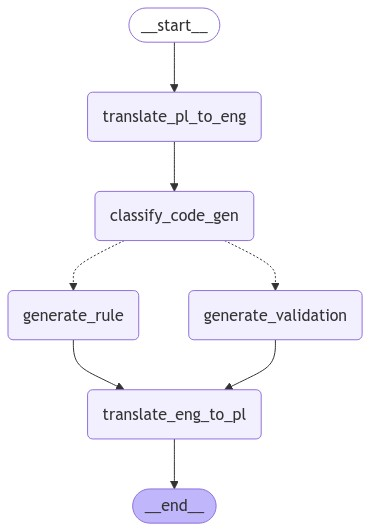

In [94]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass